<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/graph_rag_image_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair

# Draft 0

In [ ]:
# import os
# import time
# import networkx as nx
# import google.generativeai as genai
# from langchain_experimental.graph_transformers import LLMGraphTransformer
# from langchain_google_genai import GoogleGenerativeAI
# from langchain.chains import GraphQAChain
# from langchain_core.documents import Document
# from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [ ]:
# import google.generativeai as genai
# from google.colab import userdata

# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
# genai.configure(api_key=GOOGLE_API_KEY)
# llm = GoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

In [ ]:
# # Input text
# doc_text = """
# A traveler, John Doe, lost his black Samsonite suitcase at JFK Airport on February 20th.
# He last saw it at the security checkpoint in Terminal 4 before proceeding to Gate B22 for his flight to London.
# The suitcase contains important documents, a laptop, and personal belongings.
# Airport security reviewed footage from multiple CCTV cameras along the route from security to the boarding gate.
# It was last seen near a coffee shop in the terminal before disappearing from view.
# The airport authorities are investigating whether it was misplaced, stolen, or mistakenly taken by another passenger.
# """

# documents = [Document(page_content=doc_text)]

In [ ]:
# # Initialize the Graph Transformer
# llm_transformer = LLMGraphTransformer(llm=llm)
# graph_documents = llm_transformer.convert_to_graph_documents(documents)

# # Filter Graph Transformer
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Item", "Location", "Event"],
#     allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS"],
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# # Create NetworkX Graph
# graph = NetworkxEntityGraph()

In [ ]:
# # Add nodes to the graph
# for node in graph_documents_filtered[0].nodes:
#     graph.add_node(node.id)

# # Add edges to the graph
# for edge in graph_documents_filtered[0].relationships:
#     graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)


In [ ]:
# # Initialize the GraphQAChain
# chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [ ]:
# # Query the graph
# question = "Where was john doe's suitcase seen?"
# response = chain.run(question)
# print(response)

In [ ]:
!pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair matplotlib neo4j pyvis

In [ ]:
import os
import time
import networkx as nx
import requests
import matplotlib.pyplot as plt
import json
import google.generativeai as genai
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains import GraphQAChain  # Fixed import
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [ ]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
llm = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=GOOGLE_API_KEY)

In [ ]:
from neo4j import GraphDatabase
import os

# Neo4j connection details
NEO4J_URI = os.getenv("NEO4J_URI", "neo4j+s://a28c510a.databases.neo4j.io")  # Removed extra space
NEO4J_USER = os.getenv("NEO4J_USER", "neo4j")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD", "vTEJ9e3B3C5gf38onxFbhdqU8elzxvB79vprKDxjbLU")

# Initialize Neo4j driver
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

In [ ]:
# Input text - Lost suitcase scenario
text = """
A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM
"""

documents = [Document(page_content=text)]

In [ ]:
# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [ ]:
query = """MATCH (c:Category) RETURN c.name AS categories"""

try:
    with driver.session() as session:
        result = session.run(query)
        categories = [record["categories"] for record in result]  # Extract names from result
except Exception as e:
    print(f"Error received: {e}")
    categories = []  # Ensure classNames is defined even if an error occurs

print("Allowed categories Names:", categories)


Allowed categories Names: ['accessory', 'outdoor scene', 'lizard', 'bug', 'decor', 'tool', 'vehicle', 'electronics', 'instrument', 'hat', 'coral', 'building', 'vegetable', 'technology', 'flower', 'sports equipment', 'furniture', 'echinoderms', 'dog', 'cooking', 'container', 'fungus', 'train', 'fruit', 'clothing', 'crustacean', 'other', 'arachnid', 'ball', 'butterfly', 'salamander', 'primate', 'ferret', 'wild cat', 'wild dog', 'snake', 'fish', 'frog', 'food', 'turtle', 'bear', 'weapon', 'plant', 'rodent', 'aircraft', 'bird', 'mongoose', 'boat', 'toy', 'sloth', 'paper', 'mollusk', 'shark', 'cat', 'fence', 'ungulate', 'trilobite', 'lab equipment', 'rabbit']


In [ ]:
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=classNames,
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

In [ ]:
# Create NetworkX Graph
graph = NetworkxEntityGraph()

In [ ]:
# # Manually add nodes and edges
# for doc in graph_documents_filtered:
#     for node in doc.nodes:
#         graph._graph.add_node(node.id, type=node.type)
#     for edge in doc.relationships:
#         graph._graph.add_edge(edge.source?.id, edge.target.id, relation=edge.type)

In [ ]:
# AUTOMATIC NODE GEN

for doc in graph_documents:
    for node in doc.nodes:
        graph._graph.add_node(node.id, label=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

In [ ]:
# Debug: Print extracted graph structure
print("\nExtracted Graph Documents:\n", graph_documents)
print("\nGenerated Graph Nodes:", graph._graph.nodes(data=True))
print("\nGenerated Graph Edges:", graph._graph.edges(data=True))




Extracted Graph Documents:
 [GraphDocument(nodes=[Node(id='Terminal 4', type='Location', properties={}), Node(id='security checkpoint', type='Location', properties={}), Node(id='black suitcase', type='Object', properties={}), Node(id='JFK Airport', type='Location', properties={})], relationships=[Relationship(source=Node(id='black suitcase', type='Object', properties={}), target=Node(id='JFK Airport', type='Location', properties={}), type='LOCATED_AT', properties={}), Relationship(source=Node(id='black suitcase', type='Object', properties={}), target=Node(id='security checkpoint', type='Location', properties={}), type='LAST_SEEN_AT', properties={}), Relationship(source=Node(id='security checkpoint', type='Location', properties={}), target=Node(id='Terminal 4', type='Location', properties={}), type='LOCATED_IN', properties={})], source=Document(metadata={}, page_content='\nA black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM\n'))]

Gen

In [ ]:
# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [ ]:
question = f"Based on this, {graph_documents}. Where was the suitcase seen"
response = chain.run(question)
print("\nGraph Query Response:", response)



> Entering new GraphQAChain chain...
Entities Extracted:
GraphDocument, Node, Location, Terminal 4, security checkpoint, black suitcase, Object, JFK Airport, Relationship, Document
Full Context:
security checkpoint LOCATED_IN Terminal 4
black suitcase LOCATED_AT JFK Airport
black suitcase LAST_SEEN_AT security checkpoint

> Finished chain.

Graph Query Response: security checkpoint


In [ ]:
question = f"Using the provided {graph_documents}, generate a relevant category name to categorize the given item. Then, check if this className matches any existing category in {categories}. If no match is found, select a meaningful and appropriate class name based on the item's characteristics. Provide a single word answer"
selectedCategoryName = chain.run(question)
print("\nGraph Query Response:", selectedCategoryName)




> Entering new GraphQAChain chain...
Entities Extracted:
Terminal 4, JFK Airport
Full Context:


> Finished chain.

Graph Query Response: clothing


In [ ]:
query = """MATCH (l:Label)-[:SUBCATEGORY_OF]->(c:Category {name: $selectedCategoryName})
           RETURN l.name AS labels"""
try:
    with driver.session() as session:
        result = session.run(query, selectedCategoryName=selectedCategoryName)  # Use parameterized query
        labels = [record["labels"] for record in result]
except Exception as e:
    print(f"Error received: {e}")
    categories = []
print("Allowed labels:", labels)


Allowed labels: ['mask', 'pajama', 'bib', 'wig', 'mitten', 'academic_gown', 'fur_coat', 'sock', 'clog', 'cardigan', 'maillot', 'brassiere', 'sarong', 'lab_coat', 'breastplate', 'poncho', 'bikini', 'sandal', 'bulletproof_vest', 'ski_mask', 'jean', 'diaper', 'abaya', 'running_shoe', 'swimming_trunks', 'Loafer', 'cuirass', 'oxygen_mask', 'kimono', 'jersey', 'cowboy_hat', 'suit', 'hoopskirt', 'gown', 'apron', 'chain_mail', 'vestment', 'military_uniform', 'knee_pad']


In [ ]:
question = f"Based on {graph_documents} and the category name {selectedCategoryName}, select the single label from {labels} that best fits our item. If none of the existing categories are suitable, create a broad and meaningful category that falls under the class name {selectedCategoryName}. The category name should be in snake_case format (lowercase with underscores) and can be one or two words. Ensure that the class name and category name are not the same.Give one word answer"
selectedlabelName = chain.run(question)
print("\nGraph Query Response:", selectedlabelName)



> Entering new GraphQAChain chain...
Entities Extracted:
Terminal 4, JFK Airport
Full Context:


> Finished chain.

Graph Query Response: I don't know.


In [ ]:
cypher_query = """
MATCH (cls:Class {name: "ImageNet1K"})
      <-[:BELONGS_TO]-(c:Category {name: $selectedCategoryName})
      <-[:SUBCATEGORY_OF]-(l:Label {name: $selectedLabelName})
      <-[:IMAGE_OF]-(img:Image)
RETURN img.id AS image_id, img.url AS image_url, img.metadata AS image_metadata, img.embeddings AS image_embeddings
"""


# Define the parameters
params = {"selectedCategoryName": "cat", "selectedLabelName": "Egyptian_cat"}  # Change as needed
# params = {"selectedCategoryName": selectedCategoryName, "selectedLabelName": selectedlabelName}


# Execute the query in Neo4j
with driver.session() as session:
    results = session.run(cypher_query, params)
    for record in results:
        print(f"Image ID: {record['image_id']}")
        print(f"Image URL: {record['image_url']}")
        print(f"Metadata: {record['image_metadata']}")
        print(f"Embeddings: {record['image_embeddings']}\n")


Image ID: n02124075_9004.jpg
Image URL: None
Metadata: {"label_code": "n02124075", "category_name": "cat", "label_name": "Egyptian_cat", "source": "ImageNet1K"}
Embeddings: []

Image ID: n02124075_7552.jpg
Image URL: None
Metadata: {"label_code": "n02124075", "category_name": "cat", "label_name": "Egyptian_cat", "source": "ImageNet1K"}
Embeddings: []

Image ID: n02124075_1426.jpg
Image URL: None
Metadata: {"label_code": "n02124075", "category_name": "cat", "label_name": "Egyptian_cat", "source": "ImageNet1K"}
Embeddings: []

Image ID: n02124075_10910.jpg
Image URL: None
Metadata: {"label_code": "n02124075", "category_name": "cat", "label_name": "Egyptian_cat", "source": "ImageNet1K"}
Embeddings: []

Image ID: n02124075_5005.jpg
Image URL: None
Metadata: {"label_code": "n02124075", "category_name": "cat", "label_name": "Egyptian_cat", "source": "ImageNet1K"}
Embeddings: []

Image ID: n02124075_5433.jpg
Image URL: None
Metadata: {"label_code": "n02124075", "category_name": "cat", "label_

In [ ]:


# Generate the metadata
question = f"""
Given the following data:
- Selected Category Name: {selectedCategoryName}
- Selected label Name: {selectedlabelName}
- Graph Documents: {graph_documents}

Please generate the body for the API request to the `/generateEntry` endpoint. The metadata should be a JSON object containing:
1. Key-value pairs extracted from the document, segregated based on the properties of the item, such as:
   - "color"
   - "shape"
   - "size"
   - And any other relevant attributes.
2. A key called `metadata` that contains the full textual content of the document in a single paragraph without any blank lines.
3. it will also contain a key called url which will store the link to the image
4. it will also have a key called embeddings that will hvae the image embeddings initally empty but could be filled in future
Format the body as a JSON object.
"""

metadata = chain.run(question)
print("Generated Metadata:")
print(metadata)

# Step 1: Clean the metadata string (remove code block markers if present)
metadata = metadata.strip().strip("```json").strip("```").strip()

# Step 2: Parse the metadata string into a Python dictionary
try:
    metadata_dict = json.loads(metadata)
except json.JSONDecodeError as e:
    print(f"Failed to parse metadata as JSON: {e}")
    metadata_dict = {}

# Prepare the request body
print("Request Body:")
print(metadata_dict)





> Entering new GraphQAChain chain...
Entities Extracted:
Terminal 4, Location, JFK Airport
Full Context:


> Finished chain.
Generated Metadata:
```json
{
  "category": "clothing",
  "label": "I don't know.",
  "metadata": {
    "color": [
      "black"
    ],
    "shape": [],
    "size": [],
    "metadata": "A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM",
    "url": "",
    "embeddings": []
  }
}
```
Request Body:
{'category': 'clothing', 'label': "I don't know.", 'metadata': {'color': ['black'], 'shape': [], 'size': [], 'metadata': 'A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM', 'url': '', 'embeddings': []}}


In [ ]:


# # Define the prompt for generating the Cypher query
# # Define the prompt for generating the Cypher query
# prompt = f"""
# Generate a Cypher query to create nodes and relationships in a Neo4j database based on the given metadata dictionary:
# {metadata}

# ### **Relationships to maintain:**
# 1. Each `Label` belongs to a `Category`.
# 2. Each `Category` belongs to a `Class` (`ImageNet1K`).
# 3. Each `Image` is linked to a `Label`.
# 4. `Image` nodes should have the following properties:
#    - `url`: A string representing the image location.
#    - `metadata`: A list containing various properties and descriptions.
#    - `embeddings`: Initially empty, can be updated later.

# ### **Cypher Query Rules:**
# - Ensure that `Category` and `Label` nodes exist before linking them.
# - Ensure an `Image` node has the correct properties and is linked to the corresponding `Label`.
# - Minimize redundant queries and optimize structure.

# ### **Expected Cypher Query Structure:**
# ```cypher
# MERGE (cls:Class {name: "ImageNet1K"})

# MERGE (c:Category {name: $selectedClassName})
# MERGE (c)-[:BELONGS_TO]->(cls)

# MERGE (l:Label {name: $selectedCategoryName})
# MERGE (l)-[:SUBCATEGORY_OF]->(c)

# MERGE (img:Image {id: $image_id, url: $image_url, metadata: $image_metadata, embeddings: []})
# MERGE (img)-[:IMAGE_OF]->(l)

# RETURN COUNT(img) AS created
# """

# # Generate the Cypher query using the chain
# cypher_query = chain.run(prompt)
# print("\nGraph Query Response:", cypher_query)

In [ ]:


# # Function to clean the Cypher query (remove Markdown syntax)
# def clean_cypher_query(query):
#     # Remove ```cypher and ``` markers
#     if query.startswith("```cypher") and query.endswith("```"):
#         query = query[len("```cypher"):-len("```")].strip()
#     return query

# # Function to execute the Cypher query with retry mechanism
# def execute_cypher_query_with_retry(query, max_retries=5):
#     # Clean the query before execution
#     query = clean_cypher_query(query)

#     retry_count = 0
#     while retry_count < max_retries:
#         try:
#             with driver.session() as session:
#                 # Run the query
#                 result = session.run(query)
#                 # Print the result (if any)
#                 for record in result:
#                     print(record)
#             print("Query executed successfully!")
#             break  # Exit the loop if the query succeeds
#         except Exception as e:
#             retry_count += 1
#             print(f"Attempt {retry_count} failed with error: {e}")
#             if retry_count < max_retries:
#                 print("Retrying...")
#             else:
#                 print("Max retries reached. Exiting.")
#                 print(f"Last Cypher query attempted:\n{query}")
#                 print(f"Error received: {e}")
#         finally:
#             if retry_count >= max_retries:
#                 driver.close()  # Close the driver connection after max retries

# # Execute the query with retry mechanism
# execute_cypher_query_with_retry(cypher_query)

In [ ]:
# from pyvis.network import Network
# from IPython.display import display, HTML

# def fetch_graph_data(selectedCategoryName, selectedLabelName):
#     query = """
#     MATCH (img:Image)-[:IMAGE_OF]->(l:Label {name: $selectedLabelName})
#           -[:SUBCATEGORY_OF]->(c:Category {name: $selectedCategoryName})
#           -[:BELONGS_TO]->(:Class {name: "ImageNet1K"})
#     RETURN img
#     """
#     params = {"selectedCategoryName": selectedCategoryName, "selectedLabelName": selectedLabelName}

#     with driver.session() as session:
#         result = session.run(query, params)
#         images = [record["img"] for record in result]  # Extract only image nodes
#         return images  # Return only the image nodes

# # Function to visualize the graph using pyvis
# # def visualize_graph(data):
# #     net = Network(
# #         notebook=True,
# #         height="600px",
# #         width="100%",
# #         bgcolor="#222222",
# #         font_color="white",
# #         cdn_resources="in_line"
# #     )

# #     # Softer colors for better visualization
# #     node_colors = {
# #         "Class": "#FFCCCC",      # Soft red
# #         "Category": "#C1E1C1",   # Soft green
# #         "Label": "#ADD8E6",      # Soft blue
# #         "Image": "#FFD700"       # Gold for better visibility
# #     }

# #     added_nodes = set()

# #     for path in data:
# #         for i in range(len(path) - 1):
# #             source = path[i]
# #             target = path[i + 1]

# #             source_label = list(source.labels)[0]
# #             target_label = list(target.labels)[0]

# #             # Add source node
# #             if source.element_id not in added_nodes:
# #                 net.add_node(
# #                     source.element_id,
# #                     label=source.get("label_name", "Unknown"),
# #                     title=str(source),
# #                     color=node_colors.get(source_label, "gray")
# #                 )
# #                 added_nodes.add(source.element_id)

# #             # Add target node, with path as label if it's an Image
# #             if target.element_id not in added_nodes:
# #                 label = target.get("path", "Unknown") if "Image" in target_label else target.get("id", "Unknown")
# #                 net.add_node(
# #                     target.element_id,
# #                     label=label,
# #                     title=str(target),
# #                     color=node_colors.get(target_label, "gray")
# #                 )
# #                 added_nodes.add(target.element_id)

# #             # Add edge
# #             net.add_edge(source.element_id, target.element_id)

# #     # Show the graph
# #     net.show("graph.html")
# #     display(HTML("graph.html"))

# def display_pictures:


# # Fetch and visualize data
# graph_data = fetch_graph_data("vehicle", "crane")
# # visualize_graph(graph_data)
# print(graph_data[0])



In [ ]:

def fetch_graph_data(selectedCategoryName, selectedLabelName):
    query = """
    MATCH (img:Image)-[:IMAGE_OF]->(l:Label {name: $selectedLabelName})
          -[:SUBCATEGORY_OF]->(c:Category {name: $selectedCategoryName})
          -[:BELONGS_TO]->(:Class {name: "ImageNet1K"})
    RETURN img
    """
    params = {"selectedCategoryName": selectedCategoryName, "selectedLabelName": selectedLabelName}

    with driver.session() as session:
        result = session.run(query, params)
        images = [record["img"]._properties for record in result if record["img"]]  # Extract properties
        return images if images else []  # Ensure empty list instead of None
graph_data = fetch_graph_data("vehicle", "crane")


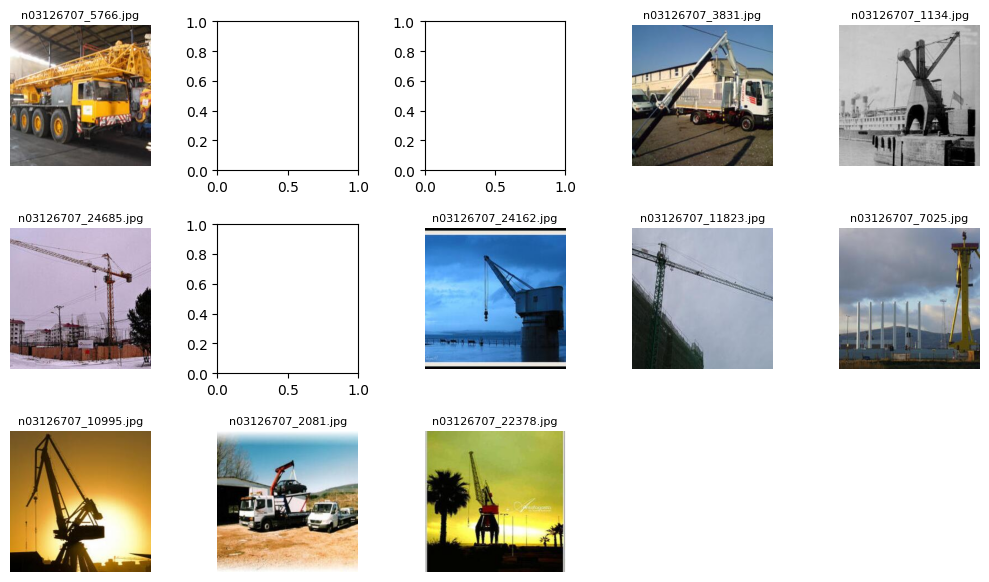

In [ ]:
import numpy as np  # Ensure numpy is imported
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import math


def display_pictures(graph_data):
    if not graph_data:  # Check if the list is empty
        print("No images found.")
        return

    # Calculate number of images to display (10% of total)
    num_images = max(1, int(len(graph_data) * 0.1))  # At least 1 image

    # Determine grid size (rows and cols)
    cols = min(5, num_images)  # Max 5 images per row
    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))  # Dynamic size

    # Ensure axes is always an iterable list
    if rows == 1 and cols == 1:
        axes = [axes]
    else:
        axes = np.array(axes).flatten()

    for i, node in enumerate(graph_data[:num_images]):  # Display up to num_images
        if "image_url" not in node:
            continue  # Skip if no image URL

        image_url = node["image_url"]
        response = requests.get(image_url)
        try:
            img = Image.open(BytesIO(response.content))
        except:
            continue

        label_name = "Unknown"
        if "metadata" in node:
            metadata = eval(node["metadata"]) if isinstance(node["metadata"], str) else node["metadata"]
            image_name = node["id"]

        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(image_name, fontsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
display_pictures(graph_data)


In [ ]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)

In [ ]:
# Improved Input text - Lost suitcase scenario with clearer relationships
doc_text = """
Incident Report: Lost Suitcase at JFK Airport

John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
He last physically saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before proceeding towards Gate B22 for his flight to London.

The suitcase was recorded on CCTV footage at 3:35 PM near the duty-free store, and at 3:40 PM near a coffee shop in Terminal 4.
At 3:50 PM, security footage showed an unknown individual picking up a suitcase near the coffee shop and walking towards the exit.

The airport authorities and security team are currently investigating the case, reviewing CCTV footage, and checking passenger logs to determine whether it was misplaced, stolen, or mistakenly taken by another passenger.
"""

documents = [Document(page_content=doc_text)]

# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Item", "Location", "Event"],
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create NetworkX Graph
graph = NetworkxEntityGraph()

# Manually add nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = "Where was John Doe's suitcase last seen?"
response = chain.run(question)
print("\nGraph Query Response:", response)



In [ ]:

# Improved input text - lost suitcase scenario
doc_text = doc_text = """
Lost Luggage Report:
- Item: Black Suitcase
- Last Seen Location: Security checkpoint, Terminal 4, JFK Airport
- Last Seen Time: 3:30 PM
"""

documents = [Document(page_content=doc_text)]

# Retrieve allowed class names from remote endpoint
response = requests.get("http://34.136.67.113:1234/getAllClassNames")
data = response.json()
classNames = data["classNames"]
print("Allowed Class Names:", classNames)

# Initialize Graph Transformer (unfiltered)
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer using allowed_nodes from classNames
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    # allowed_nodes=classNames,
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
    # allowed_relationships can also be provided if needed
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create a NetworkX Graph
graph = NetworkxEntityGraph()

# Enforce allowed nodes by filtering out any node whose type isn't in the allowed set
allowed_set = set(classNames)

# Populate the graph dynamically, only including allowed nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        if node.type in allowed_set:
            graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        if edge.source.type in allowed_set and edge.target.type in allowed_set:
            graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = f"Where is the suitcase?"
response = chain.run(question)
print("\nGraph Query Response:", response)


In [ ]:
question = f"Choose a single best class that our item fits in from the the list of {classNames}, take this as context, {response}"
new_response = chain.run(question)
print("\nGraph Query Response:", response)

In [ ]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)

# DRAFT 1

In [ ]:
# !pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair matplotlib neo4j pyvis

import os
import time
import json
import requests
import networkx as nx
import matplotlib.pyplot as plt
import google.generativeai as genai

from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains import GraphQAChain
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

from google.colab import userdata
from neo4j import GraphDatabase

from pyvis.network import Network
from IPython.display import display, HTML

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
if not GOOGLE_API_KEY:
    raise ValueError("Google API Key not found. Please set it in your environment.")
genai.configure(api_key=GOOGLE_API_KEY)
llm = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=GOOGLE_API_KEY)

NEO4J_URI = os.getenv("NEO4J_URI", "neo4j+s://a28c510a.databases.neo4j.io")
NEO4J_USER = os.getenv("NEO4J_USER", "neo4j")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD", "vTEJ9e3B3C5gf38onxFbhdqU8elzxvB79vprKDxjbLU")
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

In [ ]:
# Functions

def create_networkx_graph_from_documents(documents, transformer):
    """
    Converts a list of Document objects into a NetworkxEntityGraph using the provided transformer.
    Returns both the graph and the raw graph documents.
    """
    graph_docs = transformer.convert_to_graph_documents(documents)
    graph_entity = NetworkxEntityGraph()
    for doc in graph_docs:
        for node in doc.nodes:
            graph_entity._graph.add_node(node.id, label=node.type)
        for edge in doc.relationships:
            graph_entity._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)
    return graph_entity, graph_docs

def visualize_graph_pyvis(data):
    """
    Visualizes a list of Neo4j node paths using PyVis.
    Note: We no longer read or display the HTML; we simply generate it.
    """
    net = Network(
        notebook=True,
        height="600px",
        width="100%",
        bgcolor="#222222",
        font_color="white",
        cdn_resources="in_line"
    )
    # Softer colors for better visualization
    node_colors = {
        "Class": "#FFCCCC",
        "Category": "#C1E1C1",
        "Label": "#ADD8E6",
        "Image": "#FFD700"
    }
    added_nodes = set()
    for path in data:
        for i in range(len(path) - 1):
            source = path[i]
            target = path[i + 1]
            source_label = list(source.labels)[0] if source.labels else "Unknown"
            target_label = list(target.labels)[0] if target.labels else "Unknown"
            if source.element_id not in added_nodes:
                net.add_node(
                    source.element_id,
                    label=source.get("name", "Unknown"),
                    title=str(source),
                    color=node_colors.get(source_label, "gray")
                )
                added_nodes.add(source.element_id)
            if target.element_id not in added_nodes:
                label = target.get("path", target.get("name", "Unknown"))
                net.add_node(
                    target.element_id,
                    label=label,
                    title=str(target),
                    color=node_colors.get(target_label, "gray")
                )
                added_nodes.add(target.element_id)
            net.add_edge(source.element_id, target.element_id)
    # Simply show the graph (HTML file will be generated but not manually read/displayed)
    net.show("graph.html")

def visualize_graph_matplotlib(graph_obj):
    """
    Visualizes the NetworkxEntityGraph using matplotlib.
    """
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph_obj._graph)
    edge_labels = nx.get_edge_attributes(graph_obj._graph, 'relation')
    nx.draw(graph_obj._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph_obj._graph, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    plt.title("Graph Representation")
    plt.show()

def fetch_graph_data(selected_category, selected_label):
    """
    Fetches graph data from Neo4j based on given category and label.
    Returns a list of paths (node sequences).
    """
    query = """
    MATCH path = (cls:Class {name: "ImageNet1K"})
          <-[:BELONGS_TO]-(c:Category {name: $selected_category})
          <-[:SUBCATEGORY_OF]-(l:Label {name: $selected_label})
          <-[:IMAGE_OF]-(img:Image)
    RETURN path
    """
    params = {"selected_category": selected_category, "selected_label": selected_label}
    with driver.session() as session:
        result = session.run(query, params)
        paths = [list(record["path"].nodes) for record in result]
    return paths

In [ ]:
# Initial Graph Construction & Querying

input_text = """
A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM
"""
documents = [Document(page_content=input_text)]

llm_transformer = LLMGraphTransformer(llm=llm)
graph, graph_docs = create_networkx_graph_from_documents(documents, llm_transformer)

# Debug prints
print("\nExtracted Graph Documents:\n", graph_docs)
print("\nGenerated Graph Nodes:", graph._graph.nodes(data=True))
print("\nGenerated Graph Edges:", graph._graph.edges(data=True))

In [ ]:
neo4j_query = "MATCH (c:Category) RETURN c.name AS categories"
try:
    with driver.session() as session:
        result = session.run(neo4j_query)
        allowed_categories = [record["categories"] for record in result]
except Exception as e:
    print(f"Error during Neo4j query: {e}")
    allowed_categories = []

print("Allowed Categories:", allowed_categories)

In [ ]:
# Initialize GraphQAChain for our graph
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Location
question1 = f"Based on this graph: {graph_docs}\nWhere was the suitcase seen?"
response1 = chain.run(question1)
print("\nGraph Query Response:", response1, )

# Category
question2 = (f"Using the provided graph data: {graph_docs}\n"
             f"Generate a relevant single-word category name for the lost suitcase. "
             f"Check if this category exists in {allowed_categories}. If not, propose an appropriate class name.")
selected_category = chain.run(question2)
print("\nSelected Category Name:", selected_category)

# Select Category
neo4j_label_query = """
MATCH (l:Label)-[:SUBCATEGORY_OF]->(c:Category {name: $selected_category})
RETURN l.name AS labels
"""
try:
    with driver.session() as session:
        result = session.run(neo4j_label_query, selected_category=selected_category)
        allowed_labels = [record["labels"] for record in result]
except Exception as e:
    print(f"Error during label query: {e}")
    allowed_labels = []

print("Allowed Labels:", allowed_labels)

# Best Label
question3 = (f"Based on the graph data: {graph_docs}\n"
             f"and the category name '{selected_category}', select the single label from {allowed_labels} "
             f"that best fits the lost suitcase. If none are suitable, propose a meaningful label in snake_case.")
selected_label = chain.run(question3)
print("\nSelected Label Name:", selected_label)

In [ ]:
cypher_query = """
MATCH (cls:Class {name: "ImageNet1K"})
      <-[:BELONGS_TO]-(c:Category {name: $selected_category})
      <-[:SUBCATEGORY_OF]-(l:Label {name: $selected_label})
      <-[:IMAGE_OF]-(img:Image)
RETURN img.id AS image_id, img.url AS image_url, img.metadata AS image_metadata, img.embeddings AS image_embeddings
"""
params = {"selected_category": selected_category, "selected_label": selected_label}
with driver.session() as session:
    results = session.run(cypher_query, params)
    for record in results:
        print(f"Image ID: {record['image_id']}")
        print(f"Image URL: {record['image_url']}")
        print(f"Metadata: {record['image_metadata']}")
        print(f"Embeddings: {record['image_embeddings']}\n")

In [ ]:
# Metadata Generation

metadata_question = f"""
  Given the following data:
  - Selected Category Name: {selected_category}
  - Selected Label Name: {selected_label}
  - Graph Documents: {graph_docs}

  Generate the body for the API request to the `/generateEntry` endpoint.
  The JSON object should include:
  1. Key-value pairs for attributes like "color", "shape", "size", etc.
  2. A key "metadata" containing the full textual content of the document in a single paragraph.
  3. A key "url" for the image link.
  4. A key "embeddings" initialized as an empty list.
  Format the body as a JSON object.
"""

generated_metadata = chain.run(metadata_question)
print("\nGenerated Metadata (raw):")
print(generated_metadata)

# Clean and parse the metadata JSON
cleaned_metadata = generated_metadata.strip().strip("```json").strip("```").strip()
try:
    metadata_dict = json.loads(cleaned_metadata)
except json.JSONDecodeError as e:
    print(f"Failed to parse metadata as JSON: {e}")
    metadata_dict = {}
print("Final Request Body:", metadata_dict)

In [ ]:
graph_data_paths = fetch_graph_data(selected_category, selected_label)
visualize_graph_pyvis(graph_data_paths)

In [ ]:
visualize_graph_matplotlib(graph)

In [ ]:
# #############################################
# # Part 4: Improved Graph Extraction with Filtered Data
# #############################################

# # Improved input text with clearer relationships
# improved_doc_text = """
# Incident Report: Lost Suitcase at JFK Airport

# John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
# He last saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before heading to Gate B22 for his flight.
# CCTV footage recorded the suitcase near a duty-free store at 3:35 PM and near a coffee shop at 3:40 PM.
# At 3:50 PM, an unknown individual was seen picking up a suitcase near the coffee shop.
# Airport authorities are investigating whether it was misplaced, stolen, or taken by mistake.
# """
# documents_improved = [Document(page_content=improved_doc_text)]

# # Create a filtered transformer allowing only specific node and relationship types
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Item", "Location", "Event"],
#     allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
# )
# graph_filtered, filtered_docs = create_networkx_graph_from_documents(documents_improved, llm_transformer_filtered)

# # Debug prints for the filtered graph
# print("\nExtracted Filtered Nodes:")
# print(graph_filtered._graph.nodes(data=True))
# print("\nExtracted Filtered Edges:")
# print(graph_filtered._graph.edges(data=True))

# # Initialize GraphQAChain for the filtered graph and ask a query
# chain_filtered = GraphQAChain.from_llm(llm=llm, graph=graph_filtered, verbose=True)
# filtered_query = "Where was John Doe's suitcase last seen?"
# response_filtered = chain_filtered.run(filtered_query)
# print("\nFiltered Graph Query Response:", response_filtered)

In [ ]:
query = "MATCH (n) RETURN DISTINCT labels(n) AS node_labels, properties(n) AS node_properties"
with driver.session() as session:
    results = session.run(query)
    all_nodes = [record for record in results]
print("\nAll Nodes in Neo4j:", all_nodes)

# Draft 2

In [ ]:
# --------------- 0. Environment Setup ---------------

import os
import json
import logging
from datetime import datetime
from typing import Dict, List, Optional
from dotenv import load_dotenv

load_dotenv()

# --------------- 1. Database Module ---------------
from neo4j import GraphDatabase, BoltDriver
from neo4j.exceptions import Neo4jError

class AirportGraphDB:
    """Wrapper for Neo4j operations with proper error handling"""

    def __init__(self):
        self._driver = GraphDatabase.driver(
            os.getenv("NEO4J_URI"),
            auth=(
                os.getenv("NEO4J_USER"),
                os.getenv("NEO4J_PASSWORD")
            )
        )
        self._create_indexes()
        self._define_schema()

    def _create_indexes(self):
        indexes = [
            "CREATE INDEX luggage_id_idx IF NOT EXISTS FOR (l:Luggage) ON (l.id)",
            "CREATE INDEX location_name_idx IF NOT EXISTS FOR (loc:Location) ON (loc.name)",
            "CREATE INDEX passenger_passport_idx IF NOT EXISTS FOR (p:Passenger) ON (p.passport)"
        ]
        with self._driver.session() as session:
            for index in indexes:
                session.run(index)

    def _define_schema(self):
        schema = """
        CREATE CONSTRAINT unique_luggage_id IF NOT EXISTS
        FOR (l:Luggage) REQUIRE l.id IS UNIQUE

        CREATE CONSTRAINT unique_location IF NOT EXISTS
        FOR (loc:Location) REQUIRE (loc.terminal, loc.zone) IS UNIQUE
        """
        with self._driver.session() as session:
            session.run(schema)

    def execute_query(self, query: str, params: dict = None):
        try:
            with self._driver.session() as session:
                return session.run(query, params)
        except Neo4jError as e:
            logging.error(f"Database Error: {e.code} - {e.message}")
            raise

# --------------- 2. NLP Processing Module ---------------
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain_core.documents import Document

class LuggageGraphTransformer:
    """Enhanced RAG processor with schema enforcement"""

    ALLOWED_NODES = ["Luggage", "Passenger", "Location", "Flight", "Incident"]
    ALLOWED_RELATIONSHIPS = ["LAST_SEEN_AT", "BELONGS_TO", "ASSOCIATED_FLIGHT", "REPORTED_AT"]

    def __init__(self):
        self.llm = GoogleGenerativeAI(
            model="gemini-1.5-pro",
            google_api_key=os.getenv("GOOGLE_API_KEY"),
            safety_settings={
                'HARM_CATEGORY_HARASSMENT': 'BLOCK_NONE',
                'HARM_CATEGORY_HATE_SPEECH': 'BLOCK_NONE'
            }
        )
        self.transformer = LLMGraphTransformer(
            llm=self.llm,
            allowed_nodes=self.ALLOWED_NODES,
            allowed_relationships=self.ALLOWED_RELATIONSHIPS
        )

    def process_report(self, text: str) -> dict:
        """Convert natural language report to structured graph"""
        documents = [Document(page_content=text)]
        graph_docs = self.transformer.convert_to_graph_documents(documents)
        return self._validate_graph(graph_docs[0])

    def _validate_graph(self, graph_doc) -> dict:
        """Ensure graph conforms to airport schema"""
        validated = {"nodes": [], "relationships": []}

        for node in graph_doc.nodes:
            if node.type in self.ALLOWED_NODES:
                validated["nodes"].append({
                    "id": node.id,
                    "type": node.type,
                    "properties": self._sanitize_properties(node.properties)
                })

        for rel in graph_doc.relationships:
            if rel.type in self.ALLOWED_RELATIONSHIPS:
                validated["relationships"].append({
                    "source": rel.source.id,
                    "target": rel.target.id,
                    "type": rel.type,
                    "properties": self._sanitize_properties(rel.properties)
                })

        return validated

    def _sanitize_properties(self, props: dict) -> dict:
        """Remove PII and sensitive data"""
        redacted = props.copy()
        for key in ["passport", "credit_card", "phone"]:
            if key in redacted:
                redacted[key] = "REDACTED"
        return redacted

# --------------- 3. Tracking Logic Core ---------------
class LuggageTracker:
    """Main business logic for luggage tracking"""

    def __init__(self):
        self.db = AirportGraphDB()
        self.nlp = LuggageGraphTransformer()

    def create_incident(self, report_text: str) -> str:
        """Process new lost luggage report"""
        structured_data = self.nlp.process_report(report_text)
        luggage_id = self._generate_luggage_id()

        # Store in Neo4j
        self._store_nodes(structured_data["nodes"])
        self._store_relationships(structured_data["relationships"])

        # Initialize tracking
        self.db.execute_query("""
            MATCH (l:Luggage {id: $id})
            SET l:UnderInvestigation,
                l.status = 'reported',
                l.created_at = datetime()
        """, {"id": luggage_id})

        return luggage_id

    def _generate_luggage_id(self) -> str:
        """Generate unique luggage identifier"""
        return f"LUG-{datetime.now().strftime('%Y%m%d%H%M%S')}"

    def _store_nodes(self, nodes: List[dict]):
        for node in nodes:
            self.db.execute_query(f"""
                MERGE (n:{node['type']} {{id: $id}})
                SET n += $props
            """, {"id": node["id"], "props": node["properties"]})

    def _store_relationships(self, relationships: List[dict]):
        for rel in relationships:
            self.db.execute_query(f"""
                MATCH (a {{id: $source}}), (b {{id: $target}})
                MERGE (a)-[r:{rel['type']}]->(b)
                SET r += $props
            """, rel)

# --------------- 4. Visualization Module ---------------
from pyvis.network import Network
from IPython.display import HTML

class LuggageVisualizer:
    """Interactive graph visualization"""

    COLOR_SCHEME = {
        "Luggage": "#FF6B6B",
        "Passenger": "#4ECDC4",
        "Location": "#45B7D1",
        "Flight": "#96CEB4",
        "Incident": "#FFEEAD"
    }

    def generate_visualization(self, luggage_id: str) -> str:
        """Create interactive HTML visualization"""
        net = Network(directed=True, height="800px", width="100%")

        # Fetch data
        nodes = self.db.execute_query("""
            MATCH (n) WHERE n.id = $id OR EXISTS((n)-[]-({id: $id}))
            RETURN n
        """, {"id": luggage_id})

        # Add nodes
        for node in nodes:
            props = node["n"]
            net.add_node(
                props["id"],
                label=f"{props.get('type', 'Node')}\n{props.get('name', '')}",
                color=self.COLOR_SCHEME.get(props.get("type"), "#999999"),
                title=json.dumps(dict(props), indent=2)
            )

        # Add relationships
        relationships = self.db.execute_query("""
            MATCH (a)-[r]->(b)
            WHERE a.id = $id OR b.id = $id
            RETURN a.id, type(r) as type, b.id
        """, {"id": luggage_id})

        for rel in relationships:
            net.add_edge(
                rel["a.id"],
                rel["b.id"],
                label=rel["type"],
                arrows="to"
            )

        # Save and return
        filename = f"luggage_{luggage_id}.html"
        net.show(filename)
        return filename

# --------------- 5. Usage Example ---------------
if __name__ == "__main__":
    # Initialize system
    tracker = LuggageTracker()
    visualizer = LuggageVisualizer()

    # Sample report
    report = """
    Lost luggage report from passenger John Doe (passport ABC123):
    - Black Samsonite suitcase last seen at Terminal 4 Security Checkpoint (Zone B)
    - Flight AA123 from JFK to LHR
    - Last scanned at 2024-02-20 15:45 GMT
    """

    # Process report
    case_id = tracker.create_incident(report)
    print(f"Created case: {case_id}")

    # Generate visualization
    viz_file = visualizer.generate_visualization(case_id)
    display(HTML(viz_file))

    # Query status
    result = tracker.db.execute_query("""
        MATCH (l:Luggage {id: $id})-[:LAST_SEEN_AT]->(loc)
        RETURN l.status AS status, loc.name AS last_location
    """, {"id": case_id})

    print("\nCurrent Status:")
    for record in result:
        print(f"{record['status']} | Last seen at {record['last_location']}")


# Draft 3

In [1]:
!pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair matplotlib neo4j pyvis

import os
import time
import json
import requests
import networkx as nx
import matplotlib.pyplot as plt
import google.generativeai as genai

from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains import GraphQAChain
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

from google.colab import userdata
from neo4j import GraphDatabase

from pyvis.network import Network
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [2]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
if not GOOGLE_API_KEY:
    raise ValueError("Google API Key not found. Please set it in your environment.")
genai.configure(api_key=GOOGLE_API_KEY)
llm = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=GOOGLE_API_KEY)

NEO4J_URI = os.getenv("NEO4J_URI", "neo4j+s://a28c510a.databases.neo4j.io")
NEO4J_USER = os.getenv("NEO4J_USER", "neo4j")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD", "vTEJ9e3B3C5gf38onxFbhdqU8elzxvB79vprKDxjbLU")
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

In [3]:
# Functions

def create_networkx_graph_from_documents(documents, transformer):
    """
    Converts a list of Document objects into a NetworkxEntityGraph using the provided transformer.
    Returns both the graph and the raw graph documents.
    """
    graph_docs = transformer.convert_to_graph_documents(documents)
    graph_entity = NetworkxEntityGraph()
    for doc in graph_docs:
        for node in doc.nodes:
            graph_entity._graph.add_node(node.id, label=node.type)
        for edge in doc.relationships:
            graph_entity._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)
    return graph_entity, graph_docs

def visualize_graph_pyvis(data):
    """
    Visualizes a list of Neo4j node paths using PyVis.
    Note: We no longer read or display the HTML; we simply generate it.
    """
    net = Network(
        notebook=True,
        height="600px",
        width="100%",
        bgcolor="#222222",
        font_color="white",
        cdn_resources="in_line"
    )
    # Softer colors for better visualization
    node_colors = {
        "Class": "#FFCCCC",
        "Category": "#C1E1C1",
        "Label": "#ADD8E6",
        "Image": "#FFD700"
    }
    added_nodes = set()
    for path in data:
        for i in range(len(path) - 1):
            source = path[i]
            target = path[i + 1]
            source_label = list(source.labels)[0] if source.labels else "Unknown"
            target_label = list(target.labels)[0] if target.labels else "Unknown"
            if source.element_id not in added_nodes:
                net.add_node(
                    source.element_id,
                    label=source.get("name", "Unknown"),
                    title=str(source),
                    color=node_colors.get(source_label, "gray")
                )
                added_nodes.add(source.element_id)
            if target.element_id not in added_nodes:
                label = target.get("path", target.get("name", "Unknown"))
                net.add_node(
                    target.element_id,
                    label=label,
                    title=str(target),
                    color=node_colors.get(target_label, "gray")
                )
                added_nodes.add(target.element_id)
            net.add_edge(source.element_id, target.element_id)
    # Simply show the graph (HTML file will be generated but not manually read/displayed)
    net.show("graph.html")

def visualize_graph_matplotlib(graph_obj):
    """
    Visualizes the NetworkxEntityGraph using matplotlib.
    """
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph_obj._graph)
    edge_labels = nx.get_edge_attributes(graph_obj._graph, 'relation')
    nx.draw(graph_obj._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph_obj._graph, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    plt.title("Graph Representation")
    plt.show()

def fetch_graph_data(selected_category, selected_label):
    """
    Fetches graph data from Neo4j based on given category and label.
    Returns a list of paths (node sequences).
    """
    query = """
    MATCH path = (cls:Class {name: "ImageNet1K"})
          <-[:BELONGS_TO]-(c:Category {name: $selected_category})
          <-[:SUBCATEGORY_OF]-(l:Label {name: $selected_label})
          <-[:IMAGE_OF]-(img:Image)
    RETURN path
    """
    params = {"selected_category": selected_category, "selected_label": selected_label}
    with driver.session() as session:
        result = session.run(query, params)
        paths = [list(record["path"].nodes) for record in result]
    return paths

In [4]:
from huggingface_hub import login
from google.colab import userdata

hf_token = userdata.get("HF_TOKEN")
login(hf_token)

In [5]:
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.48.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [6]:
ans = image_to_text("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmJ-a1NAK5MwrkVVzJVvBdKNEoVQUrjFdRUw&s")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


In [9]:
input_text = ans[0]["generated_text"]

print(input_text)

a red suitcase sitting on top of a metal rack 


In [10]:
documents = [Document(page_content=input_text)]

llm_transformer = LLMGraphTransformer(llm=llm)
graph, graph_docs = create_networkx_graph_from_documents(documents, llm_transformer)

# Debug prints
print("\nExtracted Graph Documents:\n", graph_docs)
print("\nGenerated Graph Nodes:", graph._graph.nodes(data=True))
print("\nGenerated Graph Edges:", graph._graph.edges(data=True))


Extracted Graph Documents:
 [GraphDocument(nodes=[Node(id='suitcase', type='Object', properties={}), Node(id='red', type='Color', properties={}), Node(id='metal rack', type='Object', properties={})], relationships=[Relationship(source=Node(id='suitcase', type='Object', properties={}), target=Node(id='red', type='Color', properties={}), type='HAS_COLOR', properties={}), Relationship(source=Node(id='suitcase', type='Object', properties={}), target=Node(id='metal rack', type='Object', properties={}), type='LOCATED_ON', properties={})], source=Document(metadata={}, page_content='a red suitcase sitting on top of a metal rack '))]

Generated Graph Nodes: [('suitcase', {'label': 'Object'}), ('red', {'label': 'Color'}), ('metal rack', {'label': 'Object'})]

Generated Graph Edges: [('suitcase', 'red', {'relation': 'HAS_COLOR'}), ('suitcase', 'metal rack', {'relation': 'LOCATED_ON'})]


In [11]:
neo4j_query = "MATCH (c:Category) RETURN c.name AS categories"
try:
    with driver.session() as session:
        result = session.run(neo4j_query)
        allowed_categories = [record["categories"] for record in result]
except Exception as e:
    print(f"Error during Neo4j query: {e}")
    allowed_categories = []

print("Allowed Categories:", allowed_categories)

Allowed Categories: ['accessory', 'outdoor scene', 'lizard', 'bug', 'decor', 'tool', 'vehicle', 'electronics', 'instrument', 'hat', 'coral', 'building', 'vegetable', 'technology', 'flower', 'sports equipment', 'furniture', 'echinoderms', 'dog', 'cooking', 'container', 'fungus', 'train', 'fruit', 'clothing', 'crustacean', 'other', 'arachnid', 'ball', 'butterfly', 'salamander', 'primate', 'ferret', 'wild cat', 'wild dog', 'snake', 'fish', 'frog', 'food', 'turtle', 'bear', 'weapon', 'plant', 'rodent', 'aircraft', 'bird', 'mongoose', 'boat', 'toy', 'sloth', 'paper', 'mollusk', 'shark', 'cat', 'fence', 'ungulate', 'trilobite', 'lab equipment', 'rabbit']


In [12]:
# Initialize GraphQAChain for our graph
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Location
question1 = f"Based on this graph: {graph_docs}\nWhere was the suitcase seen?"
response1 = chain.run(question1)
print("\nGraph Query Response:", response1, )

# Category
question2 = (f"Using the provided graph data: {graph_docs}\n"
             f"Generate a relevant single-word category name for the lost suitcase. "
             f"Check if this category exists in {allowed_categories}. If not, propose an appropriate class name.")
selected_category = chain.run(question2)
print("\nSelected Category Name:", selected_category)

# Select Category
neo4j_label_query = """
MATCH (l:Label)-[:SUBCATEGORY_OF]->(c:Category {name: $selected_category})
RETURN l.name AS labels
"""
try:
    with driver.session() as session:
        result = session.run(neo4j_label_query, selected_category=selected_category)
        allowed_labels = [record["labels"] for record in result]
except Exception as e:
    print(f"Error during label query: {e}")
    allowed_labels = []

print("Allowed Labels:", allowed_labels)

# Best Label
question3 = (f"Based on the graph data: {graph_docs}\n"
             f"and the category name '{selected_category}', select the single label from {allowed_labels} "
             f"that best fits the lost suitcase. If none are suitable, propose a meaningful label in snake_case.")
selected_label = chain.run(question3)
print("\nSelected Label Name:", selected_label)



> Entering new GraphQAChain chain...


<ipython-input-12-7e86a1e6c01e>:6: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response1 = chain.run(question1)


Entities Extracted:
NONE
Full Context:


> Finished chain.

Graph Query Response: metal rack


> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Selected Category Name: container
Allowed Labels: ['chest', 'shopping_basket', 'medicine_chest', 'vault', 'crate', 'rain_barrel', 'barrel', 'washbasin', 'carton', 'shopping_cart', 'safe']


> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Selected Label Name: Based on the provided knowledge triplets, none of the labels in the list ['chest', 'shopping_basket', 'medicine_chest', 'vault', 'crate', 'rain_barrel', 'barrel', 'washbasin', 'carton', 'shopping_cart', 'safe'] are suitable for the suitcase. Therefore, a meaningful label in snake_case would be **suitcase**.


In [13]:
cypher_query = """
MATCH (cls:Class {name: "ImageNet1K"})
      <-[:BELONGS_TO]-(c:Category {name: $selected_category})
      <-[:SUBCATEGORY_OF]-(l:Label {name: $selected_label})
      <-[:IMAGE_OF]-(img:Image)
RETURN img.id AS image_id, img.url AS image_url, img.metadata AS image_metadata, img.embeddings AS image_embeddings
"""
params = {"selected_category": selected_category, "selected_label": selected_label}
with driver.session() as session:
    results = session.run(cypher_query, params)
    for record in results:
        print(f"Image ID: {record['image_id']}")
        print(f"Image URL: {record['image_url']}")
        print(f"Metadata: {record['image_metadata']}")
        print(f"Embeddings: {record['image_embeddings']}\n")

In [14]:
# Metadata Generation

metadata_question = f"""
  Given the following data:
  - Selected Category Name: {selected_category}
  - Selected Label Name: {selected_label}
  - Graph Documents: {graph_docs}

  Generate the body for the API request to the `/generateEntry` endpoint.
  The JSON object should include:
  1. Key-value pairs for attributes like "color", "shape", "size", etc.
  2. A key "metadata" containing the full textual content of the document in a single paragraph.
  3. A key "url" for the image link.
  4. A key "embeddings" initialized as an empty list.
  Format the body as a JSON object.
"""

generated_metadata = chain.run(metadata_question)
print("\nGenerated Metadata (raw):")
print(generated_metadata)

# Clean and parse the metadata JSON
cleaned_metadata = generated_metadata.strip().strip("```json").strip("```").strip()
try:
    metadata_dict = json.loads(cleaned_metadata)
except json.JSONDecodeError as e:
    print(f"Failed to parse metadata as JSON: {e}")
    metadata_dict = {}
print("Final Request Body:", metadata_dict)



> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Generated Metadata (raw):
```json
{
  "color": "red",
  "shape": null,
  "size": null,
  "material": null,
  "pattern": null,
  "condition": null,
  "brand": null,
  "metadata": "a red suitcase sitting on top of a metal rack ",
  "url": null,
  "embeddings": []
}
```
Final Request Body: {'color': 'red', 'shape': None, 'size': None, 'material': None, 'pattern': None, 'condition': None, 'brand': None, 'metadata': 'a red suitcase sitting on top of a metal rack ', 'url': None, 'embeddings': []}


In [17]:
# graph_data_paths = fetch_graph_data(selected_category, selected_label)
# visualize_graph_pyvis(graph_data_paths)

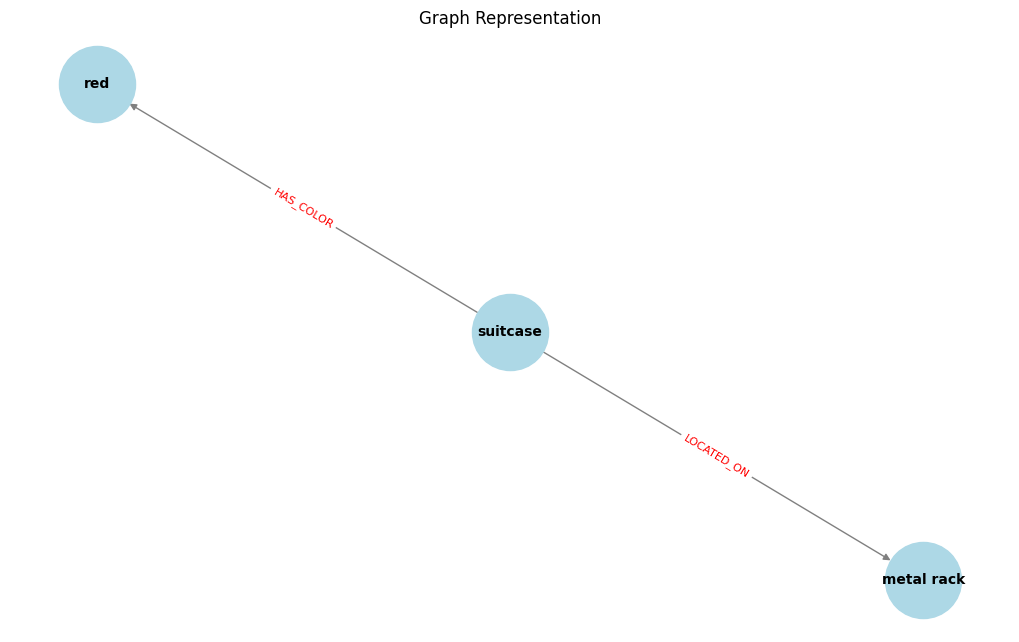

In [16]:
visualize_graph_matplotlib(graph)

In [ ]:
# #############################################
# # Part 4: Improved Graph Extraction with Filtered Data
# #############################################

# # Improved input text with clearer relationships
# improved_doc_text = """
# Incident Report: Lost Suitcase at JFK Airport

# John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
# He last saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before heading to Gate B22 for his flight.
# CCTV footage recorded the suitcase near a duty-free store at 3:35 PM and near a coffee shop at 3:40 PM.
# At 3:50 PM, an unknown individual was seen picking up a suitcase near the coffee shop.
# Airport authorities are investigating whether it was misplaced, stolen, or taken by mistake.
# """
# documents_improved = [Document(page_content=improved_doc_text)]

# # Create a filtered transformer allowing only specific node and relationship types
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Item", "Location", "Event"],
#     allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
# )
# graph_filtered, filtered_docs = create_networkx_graph_from_documents(documents_improved, llm_transformer_filtered)

# # Debug prints for the filtered graph
# print("\nExtracted Filtered Nodes:")
# print(graph_filtered._graph.nodes(data=True))
# print("\nExtracted Filtered Edges:")
# print(graph_filtered._graph.edges(data=True))

# # Initialize GraphQAChain for the filtered graph and ask a query
# chain_filtered = GraphQAChain.from_llm(llm=llm, graph=graph_filtered, verbose=True)
# filtered_query = "Where was John Doe's suitcase last seen?"
# response_filtered = chain_filtered.run(filtered_query)
# print("\nFiltered Graph Query Response:", response_filtered)

In [ ]:
query = "MATCH (n) RETURN DISTINCT labels(n) AS node_labels, properties(n) AS node_properties"
with driver.session() as session:
    results = session.run(query)
    all_nodes = [record for record in results]
print("\nAll Nodes in Neo4j:", all_nodes)